In [2]:
# CELL 1: Import thư viện và cấu hình
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Cấu hình hiển thị tiếng Việt
plt.rcParams['font.family'] = ['DejaVu Sans', 'Arial Unicode MS', 'sans-serif']
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Cấu hình Jupyter notebook
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("✅ Đã import thành công tất cả thư viện!")

✅ Đã import thành công tất cả thư viện!


In [3]:
# CELL 2: Đọc và khám phá dữ liệu
print("📁 ĐANG LOAD DỮ LIỆU...")

# Đọc file tiến trình học tập
df_progress = pd.read_excel("tien_trinh_hoc_tap.xlsx", skiprows=1)
print(f"✅ File tiến trình học tập: {df_progress.shape[0]} dòng, {df_progress.shape[1]} cột")

# Đọc file danh sách học viên
df_students = pd.read_excel("Danh_sach_hoc_vien_tham_gia_18_06_2025.xlsx", skiprows=1)
print(f"✅ File danh sách học viên: {df_students.shape[0]} dòng, {df_students.shape[1]} cột")

# Hiển thị cấu trúc dữ liệu
print("\n" + "="*50)
print("📊 CẤU TRÚC DỮ LIỆU TIẾN TRÌNH HỌC TẬP:")
print("="*50)
print("Các cột:", list(df_progress.columns))
print("\n5 dòng đầu:")
df_progress.head()

📁 ĐANG LOAD DỮ LIỆU...
✅ File tiến trình học tập: 23 dòng, 11 cột
✅ File danh sách học viên: 6 dòng, 10 cột

📊 CẤU TRÚC DỮ LIỆU TIẾN TRÌNH HỌC TẬP:
Các cột: ['STT', 'Họ tên', 'Email', 'Số điện thoại', 'Nhóm', 'Khóa học', 'Giảng viên', 'Thời gian bắt đầu', 'Thời gian kết thúc', 'Tiến trình học tập', 'Kết quả học tập']

5 dòng đầu:


,STT,Họ tên,Email,Số điện thoại,Nhóm,Khóa học,Giảng viên,Thời gian bắt đầu,Thời gian kết thúc,Tiến trình học tập,Kết quả học tập
0,1.0,Trịnh Nguyễn Phương Linh,linhtnp1210@gmail.com,NaN,NaN,ĐỊA LÍ 9,LÊ THU HẰNG,NaN,NaN,0%,Chưa hoàn thành
1,NaN,NaN,NaN,NaN,NaN,LỊCH SỬ & ĐỊA LÍ 8 (PHẦN ĐỊA LÍ),LÊ THU HẰNG,NaN,NaN,0%,Chưa hoàn thành
2,NaN,NaN,NaN,NaN,NaN,LỊCH SỬ & ĐỊA LÍ 7 (PHẦN ĐỊA LÍ),LÊ THU HẰNG,NaN,NaN,0%,Chưa hoàn thành
3,NaN,NaN,NaN,NaN,NaN,LỊCH SỬ & ĐỊA LÍ 6 (PHẦN ĐỊA LÍ),LÊ THU HẰNG,NaN,NaN,0%,Chưa hoàn thành
4,2.0,Nguyễn Trường Giang,gianggpro2004@gmail.com,NaN,NaN,ĐỊA LÍ 9,LÊ THU HẰNG,NaN,NaN,0%,Chưa hoàn thành


In [4]:
# CELL 3: Xem dữ liệu học viên
print("👥 CẤU TRÚC DỮ LIỆU HỌC VIÊN:")
print("="*50)
print("Các cột:", list(df_students.columns))
print("\n5 dòng đầu:")
df_students.head()

👥 CẤU TRÚC DỮ LIỆU HỌC VIÊN:
Các cột: ['STT', 'Họ tên', 'Email', 'Trạng thái', 'Ngày đăng ký', 'Số điện thoại', 'Giới tính', 'Nơi công tác', 'Nhóm', 'Combo - Khóa học']

5 dòng đầu:


,STT,Họ tên,Email,Trạng thái,Ngày đăng ký,Số điện thoại,Giới tính,Nơi công tác,Nhóm,Combo - Khóa học
0,1,Trịnh Nguyễn Phương Linh,linhtnp1210@gmail.com,Hoạt động,13/06/2025 15:01:21,NaN,NaN,NaN,NaN,- LỊCH SỬ & ĐỊA LÍ 6 (PHẦN ĐỊA LÍ)\n- LỊCH SỬ ...
1,2,Nguyễn Trường Giang,gianggpro2004@gmail.com,Hoạt động,13/06/2025 15:00:10,NaN,NaN,NaN,NaN,- LỊCH SỬ & ĐỊA LÍ 6 (PHẦN ĐỊA LÍ)\n- LỊCH SỬ ...
2,3,Trương Ngọc Mai,truongngocmai204@gmail.con,Hoạt động,13/06/2025 14:59:29,NaN,NaN,NaN,NaN,- LỊCH SỬ & ĐỊA LÍ 6 (PHẦN ĐỊA LÍ)\n- LỊCH SỬ ...
3,4,Lò Hoàng Việt,lohoangviet11122004@gmail.com,Hoạt động,13/06/2025 14:57:41,NaN,NaN,NaN,NaN,- LỊCH SỬ & ĐỊA LÍ 6 (PHẦN ĐỊA LÍ)\n- LỊCH SỬ ...
4,5,Cao Thị Thùy Linh,linh469844@gmail.com,Hoạt động,13/06/2025 14:56:50,837970955.0,NaN,NaN,NaN,- LỊCH SỬ & ĐỊA LÍ 6 (PHẦN ĐỊA LÍ)\n- LỊCH SỬ ...


In [5]:
# CELL 4: Làm sạch dữ liệu
print("🧹 ĐANG LÀM SẠCH DỮ LIỆU...")

# Xử lý file tiến trình học tập
df_progress_clean = df_progress.dropna(subset=['Họ tên']).copy()

# Chuyển đổi tiến trình học tập thành số
df_progress_clean['Tiến trình (%)'] = df_progress_clean['Tiến trình học tập'].str.replace('%', '').astype(float)

# Xử lý file danh sách học viên
df_students_clean = df_students.copy()
df_students_clean['Ngày đăng ký'] = pd.to_datetime(df_students_clean['Ngày đăng ký'], format='%d/%m/%Y %H:%M:%S', errors='coerce')

print(f"✅ Đã làm sạch dữ liệu:")
print(f"   - Tiến trình học tập: {len(df_progress_clean)} dòng hợp lệ")
print(f"   - Danh sách học viên: {len(df_students_clean)} dòng hợp lệ")

# Hiển thị thống kê cơ bản
print(f"\n📈 THỐNG KÊ CƠ BẢN:")
print(f"   - Tiến trình trung bình: {df_progress_clean['Tiến trình (%)'].mean():.1f}%")
print(f"   - Số khóa học: {df_progress_clean['Khóa học'].nunique()}")
print(f"   - Số giảng viên: {df_progress_clean['Giảng viên'].nunique()}")

🧹 ĐANG LÀM SẠCH DỮ LIỆU...
✅ Đã làm sạch dữ liệu:
   - Tiến trình học tập: 6 dòng hợp lệ
   - Danh sách học viên: 6 dòng hợp lệ

📈 THỐNG KÊ CƠ BẢN:
   - Tiến trình trung bình: 0.0%
   - Số khóa học: 2
   - Số giảng viên: 1


findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Fo

<Figure size 1500x1000 with 0 Axes>

findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Fo

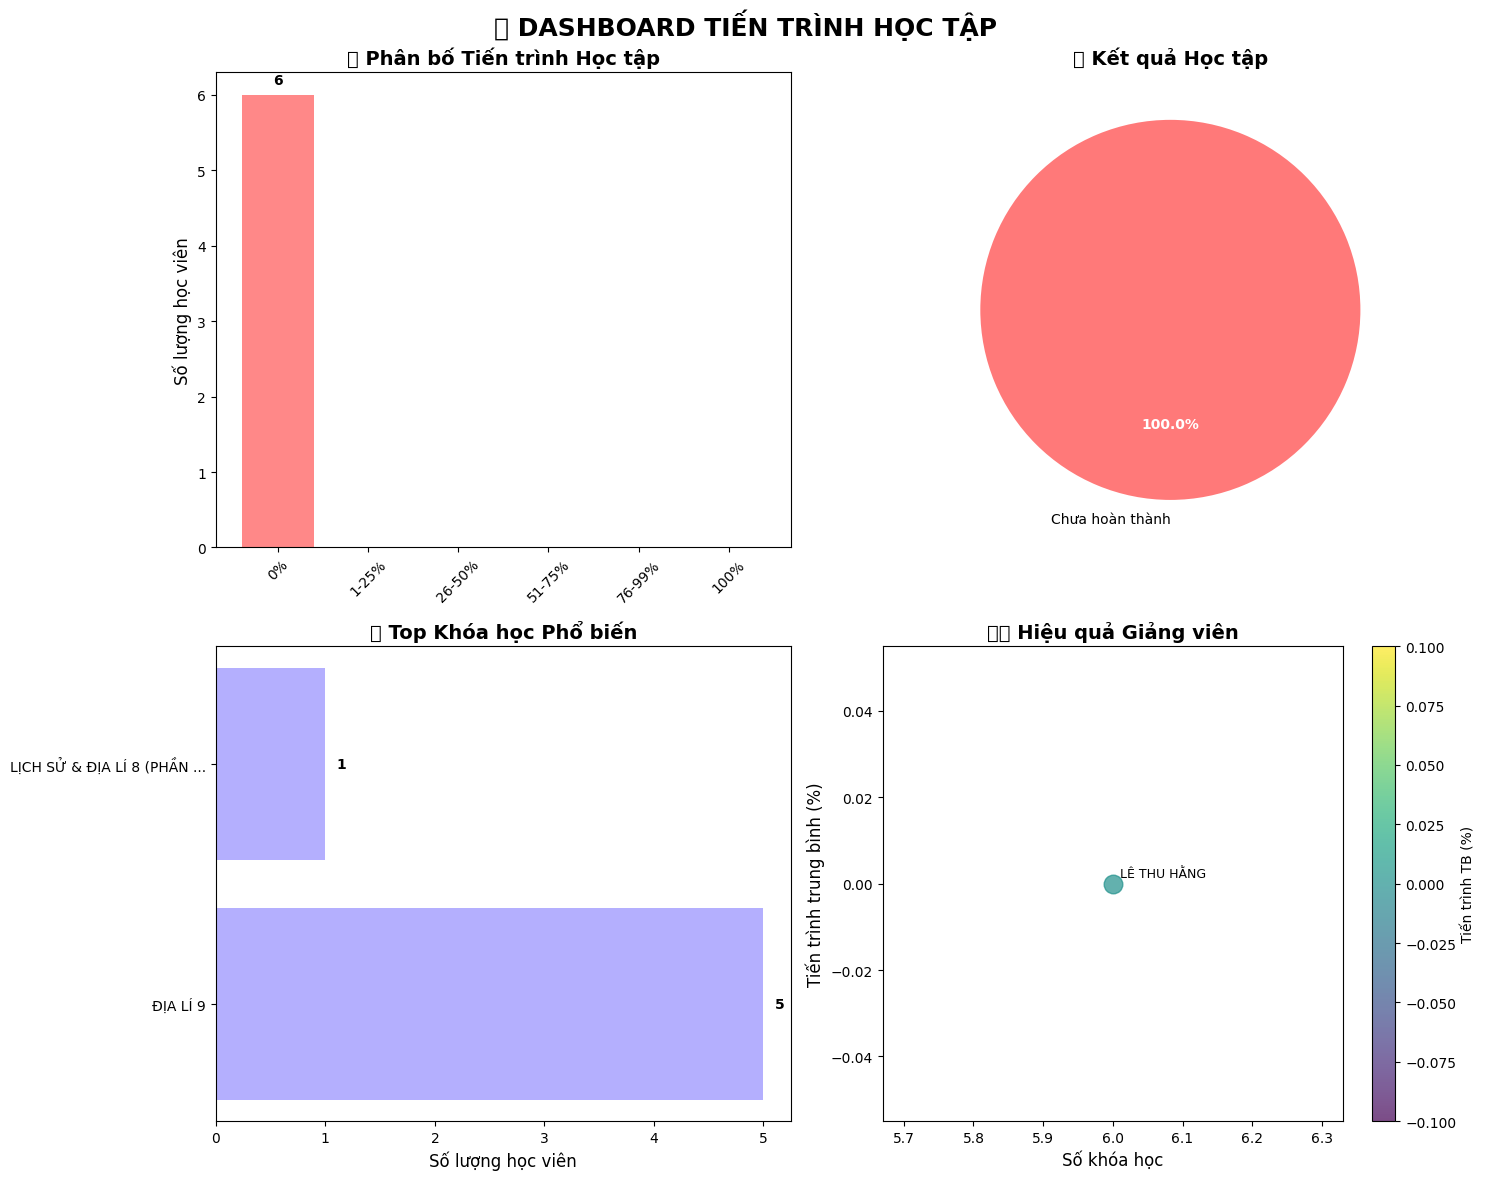

In [6]:
# CELL 5: Biểu đồ 1 - Phân bố Tiến trình Học tập
plt.figure(figsize=(15, 10))

# Tạo subplot cho 4 biểu đồ
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('📊 DASHBOARD TIẾN TRÌNH HỌC TẬP', fontsize=18, fontweight='bold', y=0.98)

# 1. Biểu đồ cột: Phân bố tiến trình học tập
progress_ranges = ['0%', '1-25%', '26-50%', '51-75%', '76-99%', '100%']
progress_counts = []

for _, row in df_progress_clean.iterrows():
    progress = row['Tiến trình (%)']
    if progress == 0:
        progress_counts.append('0%')
    elif 1 <= progress <= 25:
        progress_counts.append('1-25%')
    elif 26 <= progress <= 50:
        progress_counts.append('26-50%')
    elif 51 <= progress <= 75:
        progress_counts.append('51-75%')
    elif 76 <= progress <= 99:
        progress_counts.append('76-99%')
    elif progress == 100:
        progress_counts.append('100%')

progress_df = pd.DataFrame({'Tiến trình': progress_counts})
progress_summary = progress_df['Tiến trình'].value_counts().reindex(progress_ranges, fill_value=0)

# Tạo biểu đồ cột với màu gradient
colors = ['#ff6b6b', '#ffa726', '#ffca28', '#66bb6a', '#42a5f5', '#26c6da']
bars = axes[0,0].bar(progress_summary.index, progress_summary.values, color=colors, alpha=0.8)
axes[0,0].set_title('📈 Phân bố Tiến trình Học tập', fontsize=14, fontweight='bold')
axes[0,0].set_ylabel('Số lượng học viên', fontsize=12)
axes[0,0].tick_params(axis='x', rotation=45)

# Thêm số liệu lên cột
for bar in bars:
    height = bar.get_height()
    if height > 0:
        axes[0,0].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                      f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# 2. Biểu đồ tròn: Kết quả học tập
result_counts = df_progress_clean['Kết quả học tập'].value_counts()
pie_colors = ['#ff7979', '#74b9ff', '#00b894']
wedges, texts, autotexts = axes[0,1].pie(result_counts.values, labels=result_counts.index, 
                                        autopct='%1.1f%%', colors=pie_colors, startangle=90)
axes[0,1].set_title('🎯 Kết quả Học tập', fontsize=14, fontweight='bold')

# Làm đẹp text
for autotext in autotexts:
    autotext.set_fontweight('bold')
    autotext.set_color('white')

# 3. Biểu đồ ngang: Top khóa học phổ biến
course_counts = df_progress_clean['Khóa học'].value_counts().head(8)
y_pos = np.arange(len(course_counts))
bars_h = axes[1,0].barh(y_pos, course_counts.values, color='#a29bfe', alpha=0.8)
axes[1,0].set_yticks(y_pos)
axes[1,0].set_yticklabels([label[:25] + '...' if len(label) > 25 else label 
                          for label in course_counts.index])
axes[1,0].set_title('📚 Top Khóa học Phổ biến', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Số lượng học viên', fontsize=12)

# Thêm số liệu
for i, bar in enumerate(bars_h):
    width = bar.get_width()
    axes[1,0].text(width + 0.1, bar.get_y() + bar.get_height()/2.,
                   f'{int(width)}', ha='left', va='center', fontweight='bold')

# 4. Biểu đồ scatter: Hiệu quả giảng viên
teacher_progress = df_progress_clean.groupby('Giảng viên').agg({
    'Tiến trình (%)': ['mean', 'count'],
    'Họ tên': 'count'
}).round(1)
teacher_progress.columns = ['avg_progress', 'course_count', 'student_count']
teacher_progress = teacher_progress.reset_index()
teacher_progress = teacher_progress[teacher_progress['course_count'] >= 2]

if not teacher_progress.empty:
    scatter = axes[1,1].scatter(teacher_progress['course_count'], teacher_progress['avg_progress'], 
                               s=teacher_progress['student_count']*30, alpha=0.7, 
                               c=teacher_progress['avg_progress'], cmap='viridis')
    axes[1,1].set_xlabel('Số khóa học', fontsize=12)
    axes[1,1].set_ylabel('Tiến trình trung bình (%)', fontsize=12)
    axes[1,1].set_title('👨‍🏫 Hiệu quả Giảng viên', fontsize=14, fontweight='bold')
    
    # Thêm colorbar
    plt.colorbar(scatter, ax=axes[1,1], label='Tiến trình TB (%)')
    
    # Thêm tên giảng viên
    for i, row in teacher_progress.iterrows():
        axes[1,1].annotate(row['Giảng viên'][:15], 
                          (row['course_count'], row['avg_progress']), 
                          xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.show()

findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Fo

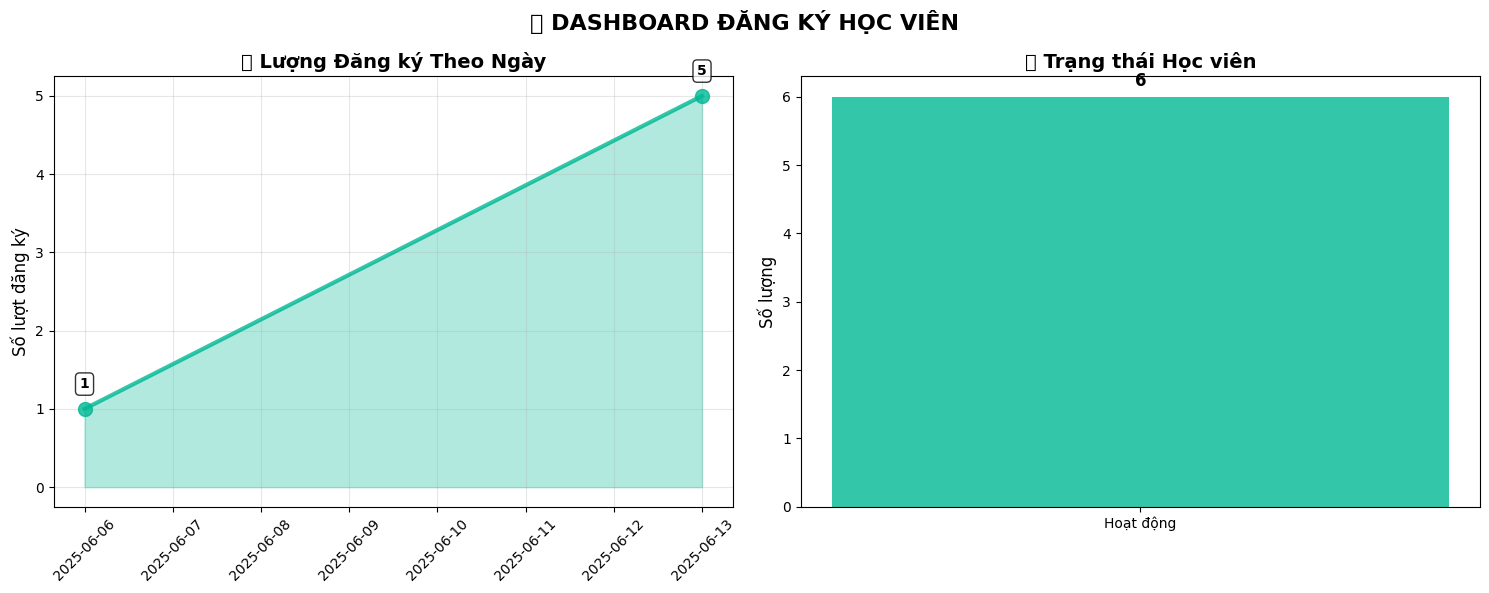

In [7]:
# CELL 6: Biểu đồ 2 - Thống kê Đăng ký Học viên
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('📅 DASHBOARD ĐĂNG KÝ HỌC VIÊN', fontsize=16, fontweight='bold')

# 1. Biểu đồ đường: Số lượng đăng ký theo ngày
daily_registrations = df_students_clean['Ngày đăng ký'].dt.date.value_counts().sort_index()

axes[0].plot(daily_registrations.index, daily_registrations.values, 
            marker='o', linewidth=3, markersize=10, color='#00b894', alpha=0.8)
axes[0].fill_between(daily_registrations.index, daily_registrations.values, alpha=0.3, color='#00b894')
axes[0].set_title('📈 Lượng Đăng ký Theo Ngày', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Số lượt đăng ký', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

# Thêm số liệu lên điểm
for x, y in zip(daily_registrations.index, daily_registrations.values):
    axes[0].annotate(f'{y}', (x, y), textcoords="offset points", 
                   xytext=(0,15), ha='center', fontweight='bold', 
                   bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

# 2. Biểu đồ cột: Trạng thái học viên
status_counts = df_students_clean['Trạng thái'].value_counts()
colors_status = ['#00b894', '#e17055', '#fdcb6e']
bars = axes[1].bar(status_counts.index, status_counts.values, 
                  color=colors_status[:len(status_counts)], alpha=0.8)
axes[1].set_title('👥 Trạng thái Học viên', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Số lượng', fontsize=12)

# Thêm số liệu lên cột
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{int(height)}', ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

In [8]:
# CELL 7: Báo cáo chi tiết và thống kê nâng cao
print("="*80)
print("📋 BÁO CÁO CHI TIẾT VÀ PHÂN TÍCH NÂNG CAO")
print("="*80)

# Thống kê tổng quan
total_enrollments = len(df_progress_clean)
avg_progress = df_progress_clean['Tiến trình (%)'].mean()
median_progress = df_progress_clean['Tiến trình (%)'].median()
completed = len(df_progress_clean[df_progress_clean['Kết quả học tập'] == 'Hoàn thành'])
completion_rate = (completed / total_enrollments) * 100

print(f"📊 THỐNG KÊ TIẾN TRÌNH HỌC TẬP:")
print(f"   • Tổng số lượt đăng ký khóa học: {total_enrollments:,}")
print(f"   • Tiến trình trung bình: {avg_progress:.1f}%")
print(f"   • Tiến trình trung vị: {median_progress:.1f}%")
print(f"   • Số lượt hoàn thành: {completed}")
print(f"   • Tỷ lệ hoàn thành: {completion_rate:.1f}%")
print(f"   • Số khóa học khác nhau: {df_progress_clean['Khóa học'].nunique()}")
print(f"   • Số giảng viên: {df_progress_clean['Giảng viên'].nunique()}")

# Phân tích theo tiến trình
progress_stats = df_progress_clean.groupby('Kết quả học tập')['Tiến trình (%)'].agg(['count', 'mean', 'std']).round(2)
print(f"\n📈 PHÂN TÍCH THEO KẾT QUẢ:")
print(progress_stats)

# Thống kê học viên
total_students = len(df_students_clean)
active_students = len(df_students_clean[df_students_clean['Trạng thái'] == 'Hoạt động'])

print(f"\n👥 THỐNG KÊ HỌC VIÊN:")
print(f"   • Tổng số học viên: {total_students}")
print(f"   • Học viên đang hoạt động: {active_students}")
print(f"   • Tỷ lệ hoạt động: {(active_students/total_students)*100:.1f}%")

if not df_students_clean['Ngày đăng ký'].isna().all():
    latest_date = df_students_clean['Ngày đăng ký'].max().strftime('%d/%m/%Y %H:%M')
    earliest_date = df_students_clean['Ngày đăng ký'].min().strftime('%d/%m/%Y %H:%M')
    print(f"   • Đăng ký gần nhất: {latest_date}")
    print(f"   • Đăng ký sớm nhất: {earliest_date}")

# Top giảng viên hiệu quả
print(f"\n🏆 TOP GIẢNG VIÊN HIỆU QUẢ:")
teacher_effectiveness = df_progress_clean.groupby('Giảng viên').agg({
    'Tiến trình (%)': ['mean', 'count'],
    'Kết quả học tập': lambda x: (x == 'Hoàn thành').sum()
}).round(1)
teacher_effectiveness.columns = ['Tiến_trình_TB', 'Số_khóa_học', 'Số_hoàn_thành']
teacher_effectiveness = teacher_effectiveness[teacher_effectiveness['Số_khóa_học'] >= 2]
teacher_effectiveness = teacher_effectiveness.sort_values('Tiến_trình_TB', ascending=False)
print(teacher_effectiveness.head())

print("="*80)


📋 BÁO CÁO CHI TIẾT VÀ PHÂN TÍCH NÂNG CAO
📊 THỐNG KÊ TIẾN TRÌNH HỌC TẬP:
   • Tổng số lượt đăng ký khóa học: 6
   • Tiến trình trung bình: 0.0%
   • Tiến trình trung vị: 0.0%
   • Số lượt hoàn thành: 0
   • Tỷ lệ hoàn thành: 0.0%
   • Số khóa học khác nhau: 2
   • Số giảng viên: 1

📈 PHÂN TÍCH THEO KẾT QUẢ:
                 count  mean  std
Kết quả học tập                  
Chưa hoàn thành      6   0.0  0.0

👥 THỐNG KÊ HỌC VIÊN:
   • Tổng số học viên: 6
   • Học viên đang hoạt động: 6
   • Tỷ lệ hoạt động: 100.0%
   • Đăng ký gần nhất: 13/06/2025 15:01
   • Đăng ký sớm nhất: 06/06/2025 15:43

🏆 TOP GIẢNG VIÊN HIỆU QUẢ:
             Tiến_trình_TB  Số_khóa_học  Số_hoàn_thành
Giảng viên                                            
LÊ THU HẰNG            0.0            6              0


In [12]:
# CELL 8: Xuất dữ liệu và lưu biểu đồ (Tùy chọn)
# Uncomment các dòng dưới nếu muốn lưu biểu đồ và export dữ liệu


# Tạo thư mục output
import os
os.makedirs('output', exist_ok=True)

# Lưu các dataset đã xử lý
df_progress_clean.to_excel('output/progress_cleaned.xlsx', index=False)
df_students_clean.to_excel('output/students_cleaned.xlsx', index=False)

# Lưu báo cáo thống kê
with open('output/summary_report.txt', 'w', encoding='utf-8') as f:
    f.write("BÁO CÁO THỐNG KÊ HỌC TẬP\\n")
    f.write("="*50 + "\\n")
    f.write(f"Tổng số lượt đăng ký: {total_enrollments}\\n")
    f.write(f"Tiến trình trung bình: {avg_progress:.1f}%\\n")
    f.write(f"Tỷ lệ hoàn thành: {completion_rate:.1f}%\\n")
    # ... thêm các thống kê khác

print("✅ Đã lưu tất cả dữ liệu vào thư mục 'output'")


print("🎉 HOÀN THÀNH TẤT CẢ PHÂN TÍCH!")
print("💡 Tip: Bạn có thể chạy lại các cell để cập nhật biểu đồ khi dữ liệu thay đổi")

✅ Đã lưu tất cả dữ liệu vào thư mục 'output'
🎉 HOÀN THÀNH TẤT CẢ PHÂN TÍCH!
💡 Tip: Bạn có thể chạy lại các cell để cập nhật biểu đồ khi dữ liệu thay đổi


In [ ]:
# CELL 9: Tạo biểu đồ tương tác (Bonus - nếu có plotly)

# Uncomment nếu muốn tạo biểu đồ tương tác với Plotly
# pip install plotly

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Biểu đồ tương tác tiến trình học tập
fig = px.histogram(df_progress_clean, x='Tiến trình (%)', 
                   title='📊 Phân bố Tiến trình Học tập (Tương tác)',
                   labels={'Tiến trình (%)': 'Tiến trình (%)', 'count': 'Số lượng'},
                   color_discrete_sequence=['#3498db'])
fig.update_layout(showlegend=False)
fig.show()

# Biểu đồ sunburst cho khóa học và giảng viên
fig = px.sunburst(df_progress_clean, 
                  path=['Giảng viên', 'Khóa học'], 
                  values='Tiến trình (%)',
                  title='🌟 Cấu trúc Khóa học theo Giảng viên')
fig.show()


SyntaxError: invalid syntax. Perhaps you forgot a comma? (37520957.py, line 4)